In [1]:
!pip3 install -U ucimlrepo 

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80) 
  
# data (as pandas dataframes) 
X = optical_recognition_of_handwritten_digits.data.features 
y = optical_recognition_of_handwritten_digits.data.targets 
  
# metadata 
print(optical_recognition_of_handwritten_digits.metadata) 
  
# variable information 
print(optical_recognition_of_handwritten_digits.variables) 



{'uci_id': 80, 'name': 'Optical Recognition of Handwritten Digits', 'repository_url': 'https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits', 'data_url': 'https://archive.ics.uci.edu/static/public/80/data.csv', 'abstract': 'Two versions of this database available; see folder', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 5620, 'num_features': 64, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Wed Aug 23 2023', 'dataset_doi': '10.24432/C50P49', 'creators': ['E. Alpaydin', 'C. Kaynak'], 'intro_paper': {'ID': 280, 'type': 'NATIVE', 'title': 'Methods of Combining Multiple Classifiers and Their Applications to Handwritten Digit Recognition', 'authors': 'C. Kaynak', 'venue': 'MSc Thesis, Institute of Graduate Studies in Science and Engineering, 

In [3]:
print(X.shape)  # To see how many samples and features are there
print(y.shape)  # To check how many target labels you have



(5620, 64)
(5620, 1)


In [4]:
print(X.head())  # View the first few rows of the features
print(y.head()) 


   Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
0           0           1           6          15          12           1   
1           0           0          10          16           6           0   
2           0           0           8          15          16          13   
3           0           0           0           3          11          16   
4           0           0           5          14           4           0   

   Attribute7  Attribute8  Attribute9  Attribute10  ...  Attribute55  \
0           0           0           0            7  ...            0   
1           0           0           0            7  ...            3   
2           0           0           0            1  ...            0   
3           0           0           0            0  ...            0   
4           0           0           0            0  ...           12   

   Attribute56  Attribute57  Attribute58  Attribute59  Attribute60  \
0            0            0       

In [6]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_standardized = scaler.fit_transform(X)

print(f'Mean after standardization: {X_standardized.mean(axis=0)}')
print(f'Standard deviation after standardization: {X_standardized.std(axis=0)}')


Mean after standardization: [ 0.00000000e+00  2.52862184e-17  5.05724367e-17 -1.92175259e-16
  1.11259361e-16  9.60876297e-17  3.41363948e-17  2.90791511e-17
 -1.01144873e-17  1.01144873e-17  9.79840961e-17 -1.59303176e-16
 -1.06202117e-16  8.09158987e-17  1.77003528e-17 -2.02289747e-17
  3.79293275e-18 -4.48830376e-17 -7.08014114e-17 -2.33897520e-17
 -6.63763232e-18 -8.85017642e-17  2.27575965e-17  2.90791511e-17
 -6.95371005e-18  3.12916952e-17 -7.96515878e-17  3.54007057e-17
  6.38477013e-17 -1.44131445e-16 -1.89646638e-17  2.27575965e-17
 -1.26431092e-18 -7.58586551e-18  1.58038865e-18  3.35042393e-17
  9.10303861e-17 -7.20657223e-17  6.06869241e-17  0.00000000e+00
  0.00000000e+00  1.13787983e-17 -2.02289747e-17  5.43653695e-17
  7.33300332e-17 -1.39074201e-16  0.00000000e+00  8.85017642e-18
  8.85017642e-18 -1.51717310e-17 -1.26431092e-17 -4.29865712e-17
 -1.28959714e-16  5.05724367e-18  2.78148402e-17 -7.58586551e-18
  6.95371005e-18 -5.05724367e-17  2.02289747e-17 -1.41602823e-

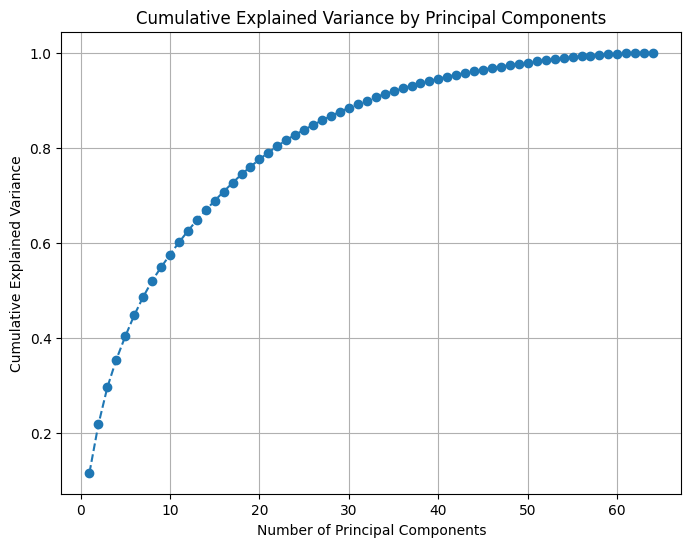

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Initialize PCA (without specifying the number of components)
pca = PCA()

# Fit PCA to the standardized data
pca.fit(X_standardized)

# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, X_standardized.shape[1] + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)


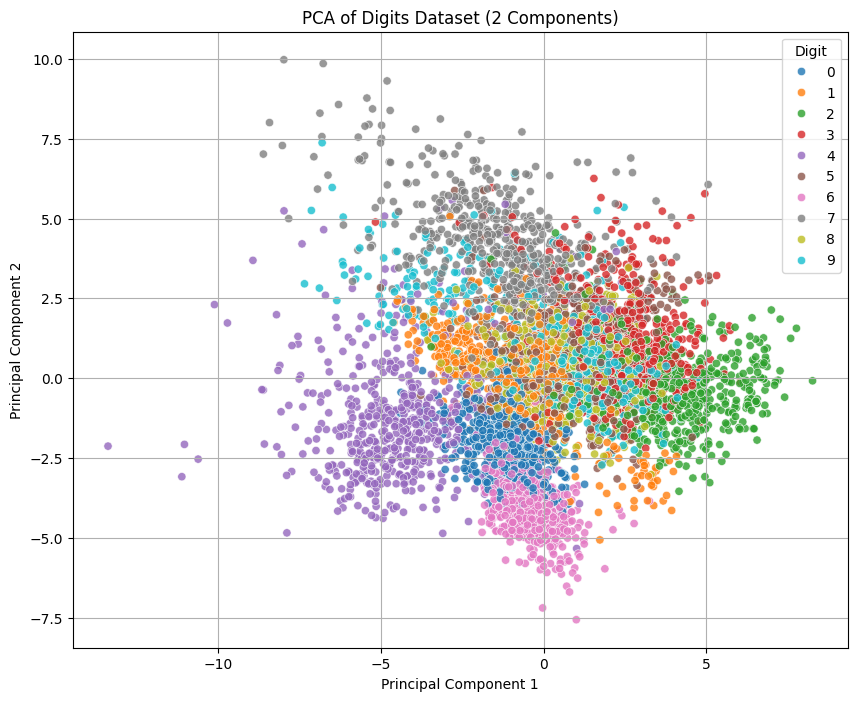

In [10]:
import seaborn as sns

# Create a DataFrame for easy plotting
import pandas as pd
X_pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
X_pca_df['Digit'] = y

# Plot the 2D projection
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Digit', palette='tab10', data=X_pca_df, legend='full', alpha=0.8)
plt.title('PCA of Digits Dataset (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

